# **Importing Libraries**

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Reshape
from tensorflow.keras.layers import Conv2D, MaxPool2D
import seaborn as sns
import re
import scipy.stats as stats

# **Loading Data**
Mounting Google drive in Colab Notebook  

In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Extracting features from the data

In [3]:
Features = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
data = pd.read_csv('/content/gdrive/MyDrive/WISDM Dataset/WISDM_at_v2.0/WISDM_at_v2.0_raw.txt', header = None, names = Features)

<ipython-input-3-038529cfde9d>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/MyDrive/WISDM Dataset/WISDM_at_v2.0/WISDM_at_v2.0_raw.txt', header = None, names = Features)


In [4]:
data.head(5)

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1679,Walking,1370520469556,0.294132,-0.635605,-0.22693644;
1,1679,Walking,1370520469606,-0.499688,-0.604451,-0.22602014;
2,1679,Walking,1370520469656,-2.178345,0.713491,0.37201694;
3,1679,Walking,1370520469706,-2.797763,1.354899,-0.27763826;
4,1679,Walking,1370520469756,-2.167961,-1.327716,-0.5549711;


# **Data Pre-Processing and Exploraotory Data Analysis**

Dropping null or empty values from the dataset

In [5]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980765 entries, 0 to 3005410
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  object 
 3   x-axis     float64
 4   y-axis     float64
 5   z-axis     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.2+ MB


Converting Z-axis from object to float64



In [6]:
data['z-axis'] = data['z-axis'].map(lambda x: str(re.findall("\d+\.\d+", str(x))))
data['z-axis'] = data['z-axis'].map(lambda x: x[2:-2])
data['z-axis'] = pd.to_numeric(data['z-axis'],errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980765 entries, 0 to 3005410
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  object 
 3   x-axis     float64
 4   y-axis     float64
 5   z-axis     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 159.2+ MB


In [8]:
print(data.head())

   user activity      timestamp    x-axis    y-axis    z-axis
0  1679  Walking  1370520469556  0.294132 -0.635605  0.226936
1  1679  Walking  1370520469606 -0.499688 -0.604451  0.226020
2  1679  Walking  1370520469656 -2.178345  0.713491  0.372017
3  1679  Walking  1370520469706 -2.797763  1.354899  0.277638
4  1679  Walking  1370520469756 -2.167961 -1.327716  0.554971


The samples present in the data against each activity

In [9]:
data['activity'].value_counts()

Walking      1255923
Sitting       663706
Jogging       438871
Standing      288873
LyingDown     275967
Stairs         57425
Name: activity, dtype: int64

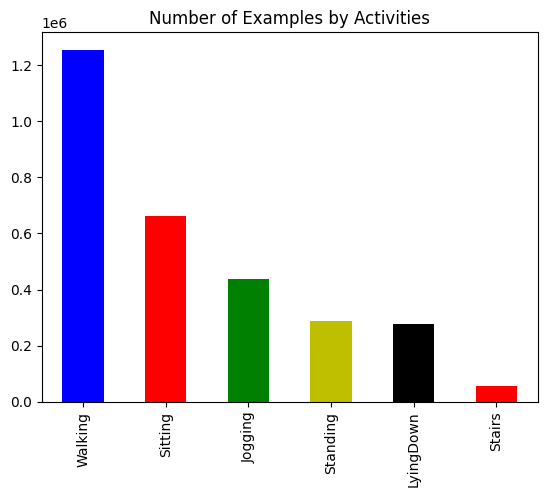

In [10]:
data['activity'].value_counts().plot(kind='bar', title='Number of Examples by Activities',color=['b','r','g','y','k','r']);

In [11]:
def plot_activity(activity, data):
    data = data[data['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:400]
    axis = data["x-axis"].plot(subplots=True,
                     title=activity,color="b")
    axis = data["y-axis"].plot(subplots=True,
                 title=activity,color="r")
    axis = data["z-axis"].plot(subplots=True,
             title=activity,color="g")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

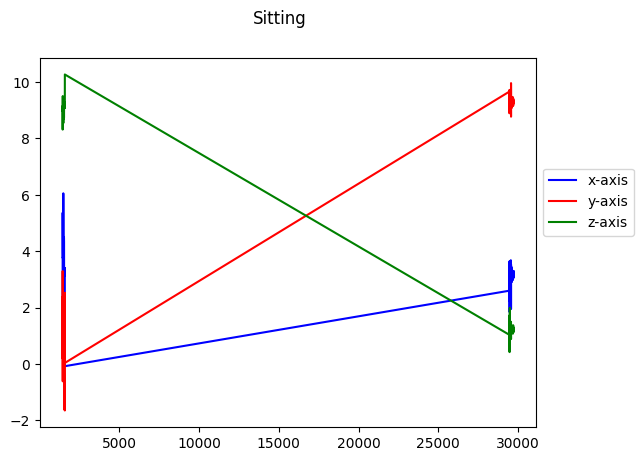

In [12]:
plot_activity("Sitting", data)

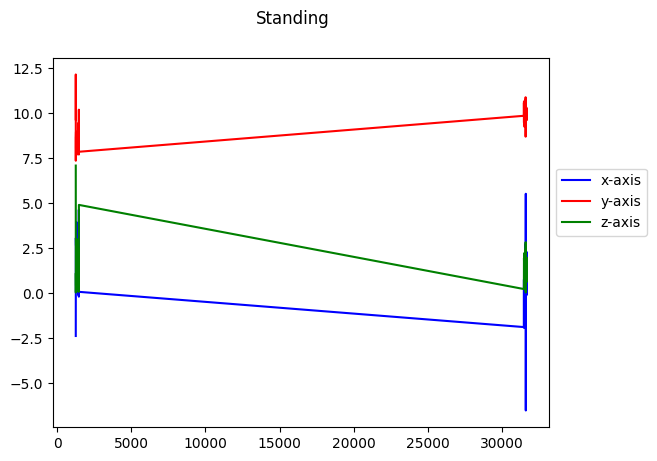

In [13]:
plot_activity("Standing", data)

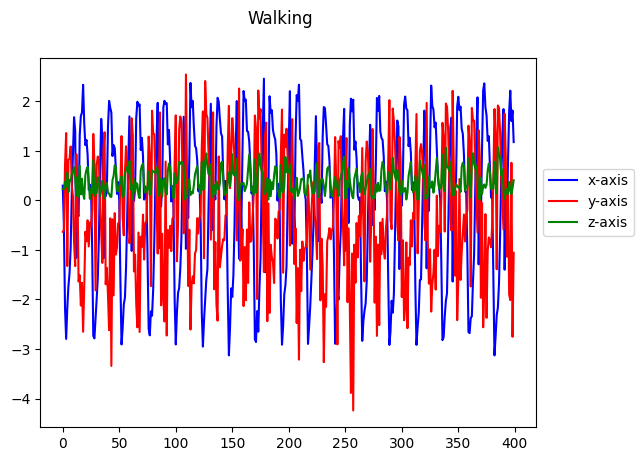

In [14]:
plot_activity("Walking", data)

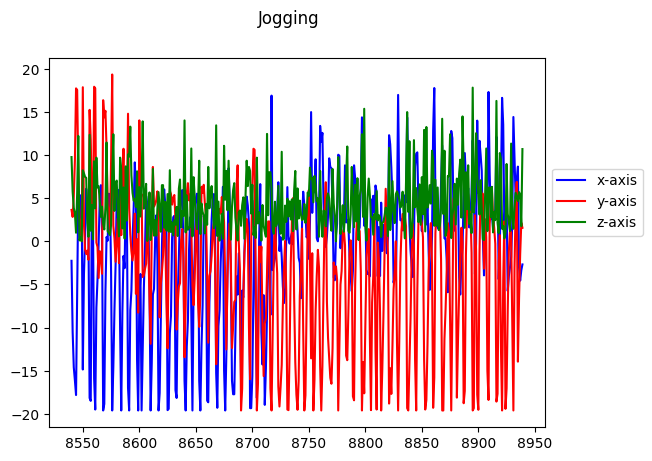

In [15]:
plot_activity("Jogging", data)

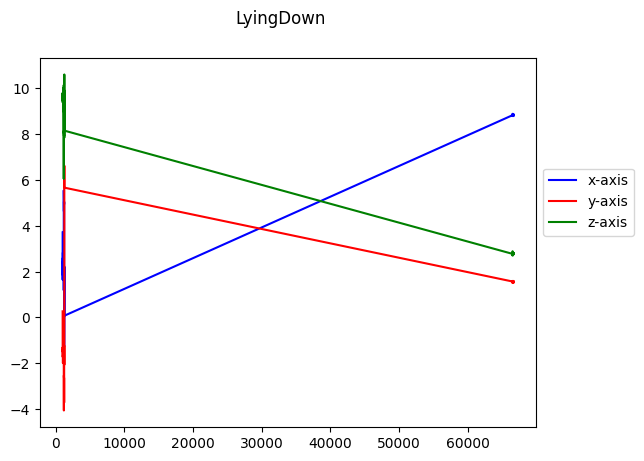

In [16]:
plot_activity("LyingDown", data)


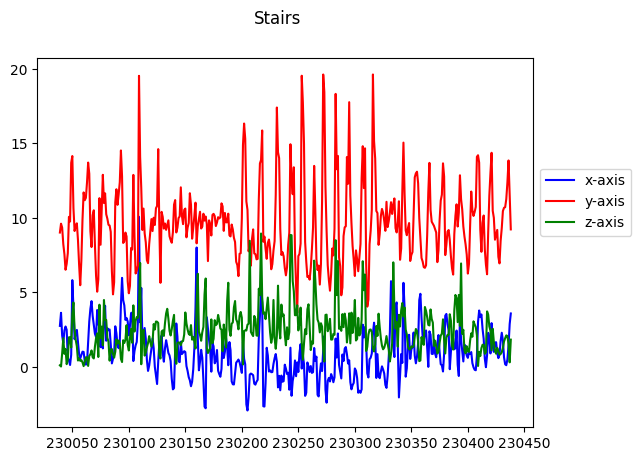

In [17]:
plot_activity("Stairs", data)


In [18]:
data=data.drop(['user','timestamp'],axis=1)

As the data is not balanced, so least sample activity is considered as base for taking samples from all the other activities

In [19]:
Walking = data[data['activity']=='Walking'].head(57425).copy()
Sitting = data[data['activity']=='Sitting'].head(57425).copy()
Jogging = data[data['activity']=='Jogging'].head(57425).copy()
Standing = data[data['activity']=='Standing'].head(57425).copy()
LyingDown = data[data['activity']=='LyingDown'].head(57425).copy()
Stairs = data[data['activity']=='Stairs'].copy()

The finalized data comprises of equal number of samples for all the activities

In [20]:
final_data=pd.DataFrame()
final_data=final_data.append([Walking, Sitting, Jogging, Standing, LyingDown, Stairs])
print(final_data.head())
final_data['activity'].value_counts()

  activity    x-axis    y-axis    z-axis
0  Walking  0.294132 -0.635605  0.226936
1  Walking -0.499688 -0.604451  0.226020
2  Walking -2.178345  0.713491  0.372017
3  Walking -2.797763  1.354899  0.277638
4  Walking -2.167961 -1.327716  0.554971


<ipython-input-20-c28b01e2d343>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data=final_data.append([Walking, Sitting, Jogging, Standing, LyingDown, Stairs])


Walking      57425
Sitting      57425
Jogging      57425
Standing     57425
LyingDown    57425
Stairs       57425
Name: activity, dtype: int64

The final data consist of 344550 samples and 4 features (activity,x-axis,y-axis, and z-axis)

In [21]:
final_data.shape

(344550, 4)

As the AI models doesnt understand the objects, it is therefore required to convert it into Labels to easily understand it.

In [22]:
label = LabelEncoder()
final_data['label'] = label.fit_transform(final_data['activity'])
# final_data.head()

class_labels = label.classes_
class_encoded_values = label.transform(class_labels)

# Class labels and their encoded values
class_info = pd.DataFrame({'Class Label': class_labels, 'Encoded Value': class_encoded_values})
print(class_info)

  Class Label  Encoded Value
0     Jogging              0
1   LyingDown              1
2     Sitting              2
3      Stairs              3
4    Standing              4
5     Walking              5


The final data is splitted into X_data which consist of the features and the y_data comprises of the relevant label.

In [23]:
x_data=final_data[['x-axis','y-axis','z-axis']]
y_data=final_data['label']

The data normalization is utilized for scale independence, faster convergence and improved model performance

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x_data)

scaled_x = pd.DataFrame(data=x, columns=['x','y','z'])
scaled_x['label'] = y_data.values

scaled_x

,x,y,z,label
0,-0.001704,0.001704,-0.874742,5
1,-0.001704,0.001704,-0.875033,5
2,-0.001704,0.001704,-0.828778,5
3,-0.001704,0.001704,-0.858679,5
4,-0.001704,0.001704,-0.770815,5
...,...,...,...,...
344545,-0.001704,0.001704,-0.209162,3
344546,-0.001704,0.001704,2.884867,3
344547,-0.001704,0.001704,-0.321235,3
344548,-0.001704,0.001704,0.346838,3


In [25]:
len(scaled_x)

344550

As the provided data is time-series, it is therefore required to make frames from it and provide it to the model. In that frame, the output activity will be based upon the frequently occuring label in the selected frame.

In [26]:
Fs = 20
# frame_size = Fs*4 # 80
frame_size =  80
# hop_size = Fs*2 # 40
hop_size = 40

In [27]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]

        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [28]:
X_out, y_out = get_frames(scaled_x, frame_size, hop_size)

In [29]:
X_out.shape , y_out.shape

((8612, 80, 3), (8612,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_out, y_out, test_size = 0.2, random_state = 0, stratify = y_out)

In [31]:
X_train.shape, X_test.shape

((6889, 80, 3), (1723, 80, 3))

In [32]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [33]:
X_train = X_train.reshape(6889, 80, 3, 1)
X_test = X_test.reshape(1723, 80, 3, 1)

In [34]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [35]:
X_train[0].shape


(80, 3, 1)

In [36]:
X_trainflat=X_train.reshape(6889,-1)
X_testflat= X_test.reshape(1723,-1)
X_trainflat.shape , X_testflat.shape

((6889, 240), (1723, 240))

In [37]:
X_test.shape

(1723, 80, 3, 1)

In [38]:
y_train.shape

(6889,)

# **DNN**

Deep Neural Network Architecture is deployed on the data with 1 input, 3 hidden and 1 output layer.

In [39]:
model = Sequential()
model.add(Dense(units=1024,activation='relu',input_dim=240,))
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(units=6,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_trainflat, y_train, batch_size = 128, epochs= 80,validation_data = (X_testflat,y_test))

Epoch 1/80
54/54 [==============================] - 2s 23ms/step - loss: 1.2815 - accuracy: 0.5024 - val_loss: 1.0892 - val_accuracy: 0.6349
Epoch 2/80
54/54 [==============================] - 1s 19ms/step - loss: 1.0959 - accuracy: 0.5912 - val_loss: 1.0294 - val_accuracy: 0.6419
Epoch 3/80
54/54 [==============================] - 1s 17ms/step - loss: 0.9698 - accuracy: 0.6541 - val_loss: 0.9489 - val_accuracy: 0.6291
Epoch 4/80
54/54 [==============================] - 1s 17ms/step - loss: 0.8762 - accuracy: 0.6805 - val_loss: 0.8829 - val_accuracy: 0.6912
Epoch 5/80
54/54 [==============================] - 1s 18ms/step - loss: 0.7727 - accuracy: 0.7277 - val_loss: 0.8410 - val_accuracy: 0.7098
Epoch 6/80
54/54 [==============================] - 1s 19ms/step - loss: 0.7381 - accuracy: 0.7505 - val_loss: 0.8321 - val_accuracy: 0.6994
Epoch 7/80
54/54 [==============================] - 1s 18ms/step - loss: 0.6783 - accuracy: 0.7531 - val_loss: 0.7814 - val_accuracy: 0.7266
Epoch 8/80
54

In [40]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

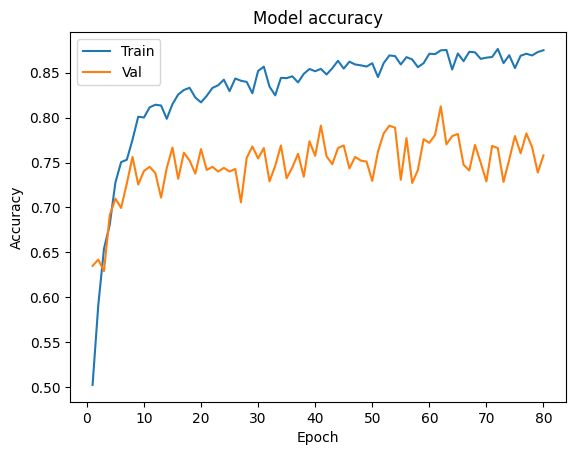

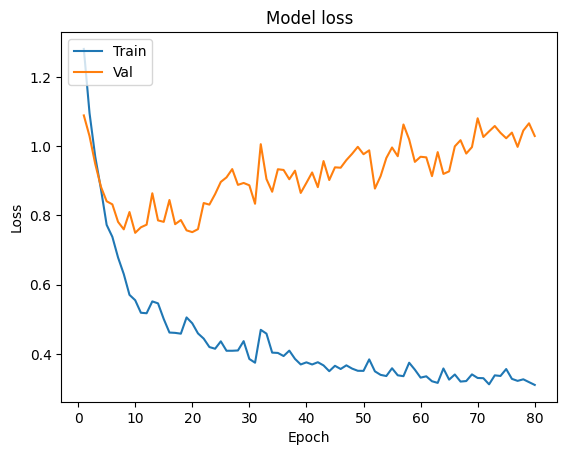

In [41]:
plot_learningCurve(history, 80)

In [42]:
accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

print("Training Accuracy:", accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Training Accuracy: 0.8750181198120117
Validation Accuracy: 0.7579802870750427


In [45]:
X_testflat= X_testflat.reshape(-1,240)

In [46]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pred_prob = model.predict(X_testflat)
pred_label=np.argmax(pred_prob, axis=1)

54/54 [==============================] - 1s 5ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

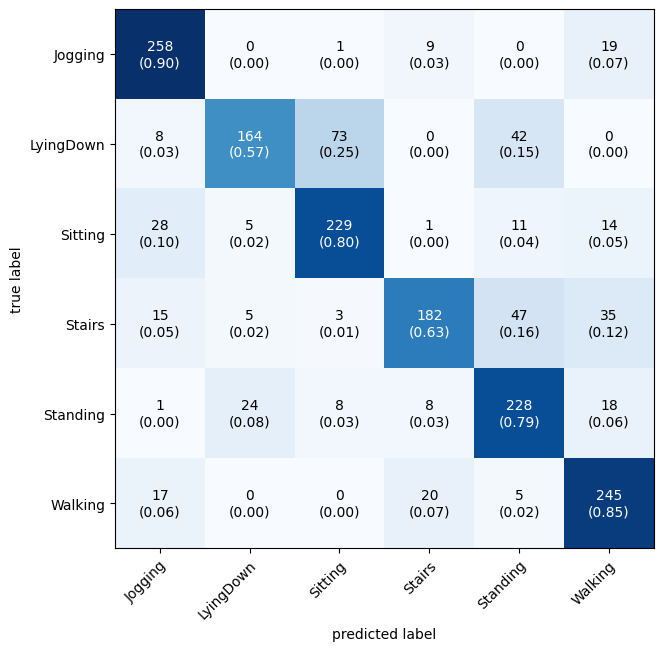

In [47]:
mat = confusion_matrix(y_test, pred_label)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

# **1D CNN**

1 Dimension Convolutional Neural Network is utilized for accessing the performance on the data.

In [48]:
X_trainCNN= X_train.reshape(6889, 80, 3)
X_testCNN = X_test.reshape(1723, 80, 3)

In [49]:
X_trainCNN.shape, X_testCNN.shape, X_test.shape,

((6889, 80, 3), (1723, 80, 3), (1723, 80, 3, 1))

In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(80,3)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected (dense) layer
model.add(Dense(64, activation='relu'))

# Add an output layer (for classification or regression)
model.add(Dense(6, activation='sigmoid'))  # Example output layer with sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape your data if necessary (e.g., if it's in the form [samples, time_steps, features])
# data = data.reshape((100, 10, 1))

# Train the model
history = model.fit(X_trainCNN, y_train, epochs = 80, validation_data= (X_testCNN, y_test), verbose=1)

Epoch 1/80
216/216 [==============================] - 3s 11ms/step - loss: 1.0512 - accuracy: 0.6342 - val_loss: 0.8743 - val_accuracy: 0.7115
Epoch 2/80
216/216 [==============================] - 2s 7ms/step - loss: 0.8061 - accuracy: 0.7315 - val_loss: 0.8136 - val_accuracy: 0.7400
Epoch 3/80
216/216 [==============================] - 1s 7ms/step - loss: 0.7393 - accuracy: 0.7436 - val_loss: 0.8011 - val_accuracy: 0.6976
Epoch 4/80
216/216 [==============================] - 1s 7ms/step - loss: 0.6892 - accuracy: 0.7656 - val_loss: 0.7531 - val_accuracy: 0.7423
Epoch 5/80
216/216 [==============================] - 1s 7ms/step - loss: 0.6671 - accuracy: 0.7616 - val_loss: 0.7227 - val_accuracy: 0.7499
Epoch 6/80
216/216 [==============================] - 1s 7ms/step - loss: 0.6298 - accuracy: 0.7805 - val_loss: 0.7133 - val_accuracy: 0.7528
Epoch 7/80
216/216 [==============================] - 1s 6ms/step - loss: 0.6150 - accuracy: 0.7810 - val_loss: 0.7312 - val_accuracy: 0.7324
Epoch

In [51]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

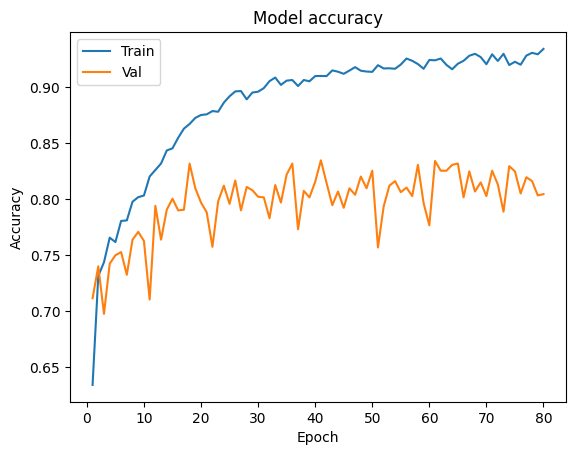

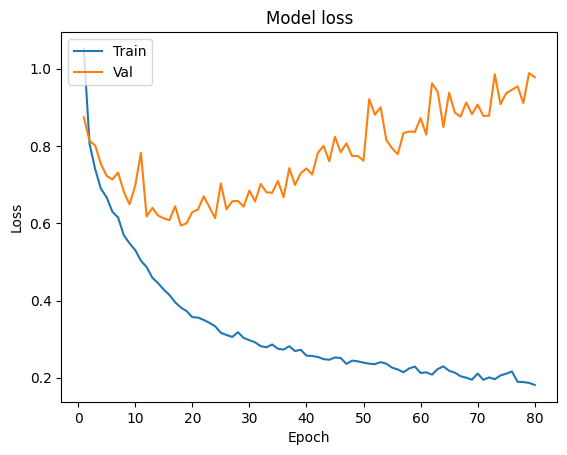

In [52]:
plot_learningCurve(history, 80)

In [53]:
accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

print("Training Accuracy:", accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Training Accuracy: 0.9339526891708374
Validation Accuracy: 0.8044109344482422


In [54]:
X_testCNN= X_testCNN.reshape(-1,80,3)

54/54 [==============================] - 0s 4ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

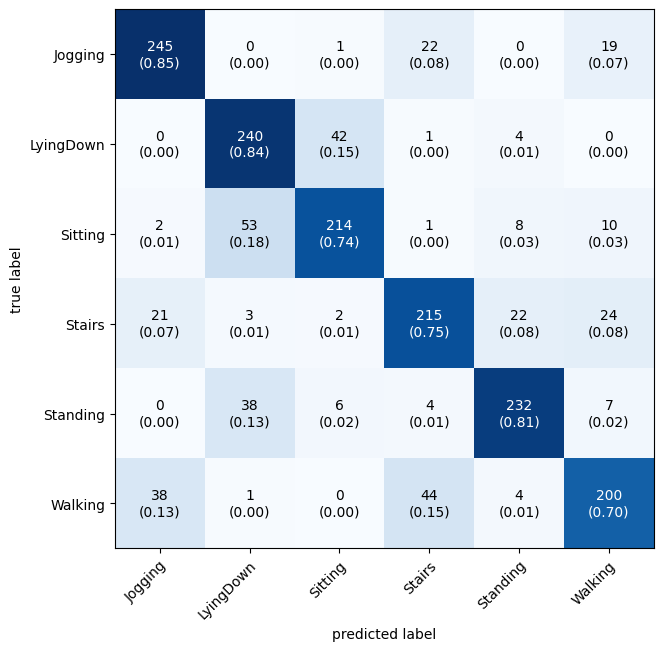

In [55]:
pred_probCNN = model.predict(X_testCNN)
pred_labelCNN=np.argmax(pred_probCNN, axis=1)
mat = confusion_matrix(y_test, pred_labelCNN)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

# **2D CNN**

In [57]:
model = Sequential()
model.add(Conv2D(64, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

# model.add(Conv2D(16, (2, 2), activation='relu'))
# model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [58]:
history = model.fit(X_train, y_train, epochs = 80, validation_data= (X_test, y_test), verbose=1)

Epoch 1/80
216/216 [==============================] - 5s 17ms/step - loss: 1.1619 - accuracy: 0.5536 - val_loss: 0.9262 - val_accuracy: 0.6889
Epoch 2/80
216/216 [==============================] - 4s 18ms/step - loss: 0.9726 - accuracy: 0.6632 - val_loss: 0.8081 - val_accuracy: 0.7446
Epoch 3/80
216/216 [==============================] - 4s 21ms/step - loss: 0.8322 - accuracy: 0.7050 - val_loss: 0.7670 - val_accuracy: 0.7121
Epoch 4/80
216/216 [==============================] - 3s 15ms/step - loss: 0.7766 - accuracy: 0.7217 - val_loss: 0.7476 - val_accuracy: 0.7394
Epoch 5/80
216/216 [==============================] - 3s 15ms/step - loss: 0.7524 - accuracy: 0.7284 - val_loss: 0.6971 - val_accuracy: 0.7382
Epoch 6/80
216/216 [==============================] - 4s 18ms/step - loss: 0.7236 - accuracy: 0.7534 - val_loss: 0.6711 - val_accuracy: 0.7551
Epoch 7/80
216/216 [==============================] - 4s 20ms/step - loss: 0.6971 - accuracy: 0.7511 - val_loss: 0.6801 - val_accuracy: 0.7394

In [59]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

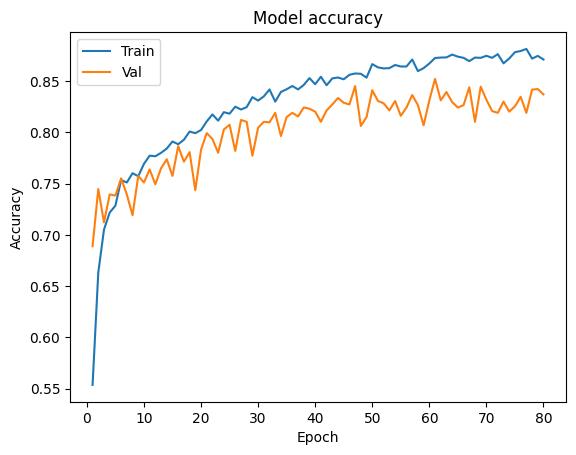

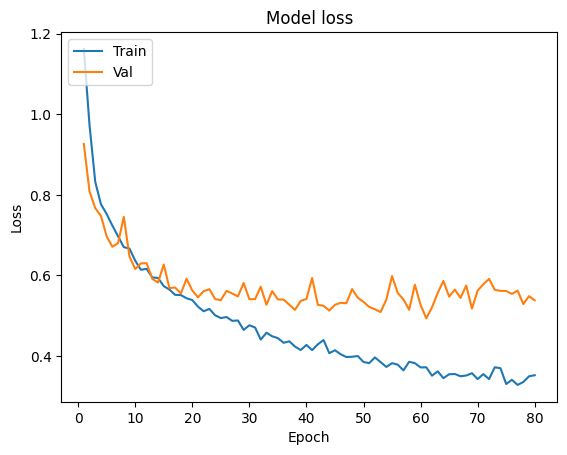

In [60]:
plot_learningCurve(history, 80)

In [61]:
accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

print("Training Accuracy:", accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Training Accuracy: 0.8709536790847778
Validation Accuracy: 0.8369123339653015


54/54 [==============================] - 0s 6ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

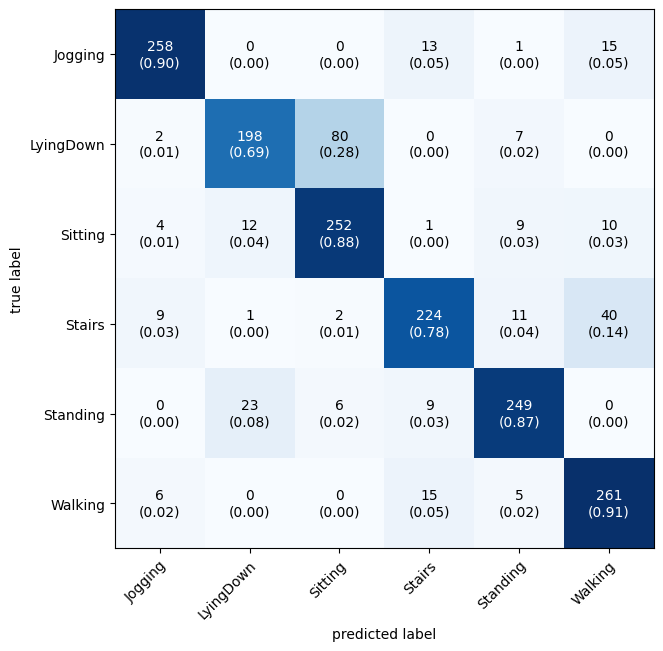

In [62]:
pred_prob = model.predict(X_test)
pred_label=np.argmax(pred_prob, axis=1)
mat = confusion_matrix(y_test, pred_label)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))